<a href="https://colab.research.google.com/github/sravya-ballem/my-python-project/blob/main/students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set plot style for better aesthetics
sns.set_style("whitegrid")

print("--- IMPORTING THE LIBRARIES ---")
print("Libraries imported successfully: pandas, numpy, matplotlib.pyplot, seaborn\n")


--- IMPORTING THE LIBRARIES ---
Libraries imported successfully: pandas, numpy, matplotlib.pyplot, seaborn



In [7]:
# --- LOADING THE DATA ---
print("--- LOADING THE DATA ---")
file_path = 'Students Social Media Addiction.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' loaded successfully.")
    print(f"Dataset shape: {df.shape} (rows, columns)\n")
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's in the correct directory.")
    exit() # Exit the script if the file isn't found
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit() # Exit on other loading errors



--- LOADING THE DATA ---
Dataset 'Students Social Media Addiction.csv' loaded successfully.
Dataset shape: (705, 13) (rows, columns)

First 5 rows of the dataset:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No   

In [9]:
# --- DATA CLEANING ---
print("\n--- DATA CLEANING ---")



--- DATA CLEANING ---


In [11]:
# Display initial information to identify potential cleaning needs (data types, non-null counts)
print("\nInitial DataFrame Info:")
df.info()


Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-n

In [13]:
# Standardize column names (e.g., remove leading/trailing spaces, replace spaces with underscores)
df.columns = df.columns.str.strip().str.replace(' ', '_')
print("\nColumn names standardized.")
print(f"Updated columns: {list(df.columns)}")



Column names standardized.
Updated columns: ['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']


In [16]:
# Check for missing values
print("\nMissing values (count) per column BEFORE handling:")
print(df.isnull().sum())


Missing values (count) per column BEFORE handling:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [18]:
# Strategy for missing values: For simplicity, we'll drop rows with any missing values.
# In a real-world scenario, imputation (mean, median, mode) or more sophisticated methods might be used.
initial_rows = df.shape[0]
df.dropna(inplace=True)
rows_after_na = df.shape[0]
if initial_rows > rows_after_na:
    print(f"\nRemoved {initial_rows - rows_after_na} rows with missing values.")
else:
    print("\nNo missing values found, or already handled.")
print("Missing values (count) per column AFTER handling:")
print(df.isnull().sum())





No missing values found, or already handled.
Missing values (count) per column AFTER handling:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [20]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
    print(f"\nFound {num_duplicates} duplicate rows. Removing them...")
    df.drop_duplicates(inplace=True)
    print(f"DataFrame shape after removing duplicates: {df.shape}")
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


In [22]:
# Data Type Conversion: Convert object columns to 'category' if they have a limited number of unique values,
# which is good for memory efficiency and some visualizations.
print("\nChecking for object columns to convert to 'category' dtype...")
for col in df.select_dtypes(include='object').columns:
    # Set a threshold, e.g., if unique values are less than 50% of total rows and less than 50 unique values
    if df[col].nunique() < len(df) * 0.5 and df[col].nunique() < 50:
        df[col] = df[col].astype('category')
        print(f"  - Converted '{col}' to 'category'.")
print("\nDataFrame Info after basic cleaning and type conversion:")
df.info()


Checking for object columns to convert to 'category' dtype...

DataFrame Info after basic cleaning and type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Student_ID                    705 non-null    int64   
 1   Age                           705 non-null    int64   
 2   Gender                        705 non-null    category
 3   Academic_Level                705 non-null    category
 4   Country                       705 non-null    object  
 5   Avg_Daily_Usage_Hours         705 non-null    float64 
 6   Most_Used_Platform            705 non-null    category
 7   Affects_Academic_Performance  705 non-null    category
 8   Sleep_Hours_Per_Night         705 non-null    float64 
 9   Mental_Health_Score           705 non-null    int64   
 10  Relationship_Status           705 non-null    cat

In [24]:
# --- EXPLORATORY DATA ANALYSIS (EDA) ---
print("\n--- EXPLORATORY DATA ANALYSIS (EDA) ---")



--- EXPLORATORY DATA ANALYSIS (EDA) ---


In [26]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics for numerical columns:")
print(df.describe())


Descriptive Statistics for numerical columns:
       Student_ID         Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
count  705.000000  705.000000             705.000000             705.000000   
mean   353.000000   20.659574               4.918723               6.868936   
std    203.660256    1.399217               1.257395               1.126848   
min      1.000000   18.000000               1.500000               3.800000   
25%    177.000000   19.000000               4.100000               6.000000   
50%    353.000000   21.000000               4.800000               6.900000   
75%    529.000000   22.000000               5.800000               7.700000   
max    705.000000   24.000000               8.500000               9.600000   

       Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
count           705.000000                   705.000000      705.000000  
mean              6.226950                     2.849645        6.436879  
std               1

In [28]:
# Value counts for categorical columns (top 10 for each, or all if few unique)
print("\nValue Counts for Categorical Columns (top values):")
categorical_cols = df.select_dtypes(include='category').columns
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n--- {col} ---")
        # Print top 10 if many unique values, else print all
        if df[col].nunique() > 10:
            print(df[col].value_counts().head(10))
        else:
            print(df[col].value_counts())
else:
    print("No categorical columns found.")


Value Counts for Categorical Columns (top values):

--- Gender ---
Gender
Female    353
Male      352
Name: count, dtype: int64

--- Academic_Level ---
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

--- Most_Used_Platform ---
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
Name: count, dtype: int64

--- Affects_Academic_Performance ---
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

--- Relationship_Status ---
Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64


In [30]:
# --- DATA VISUALIZATION ---
print("\n--- DATA VISUALIZATION ---")


--- DATA VISUALIZATION ---



Generating Histograms for numerical features...


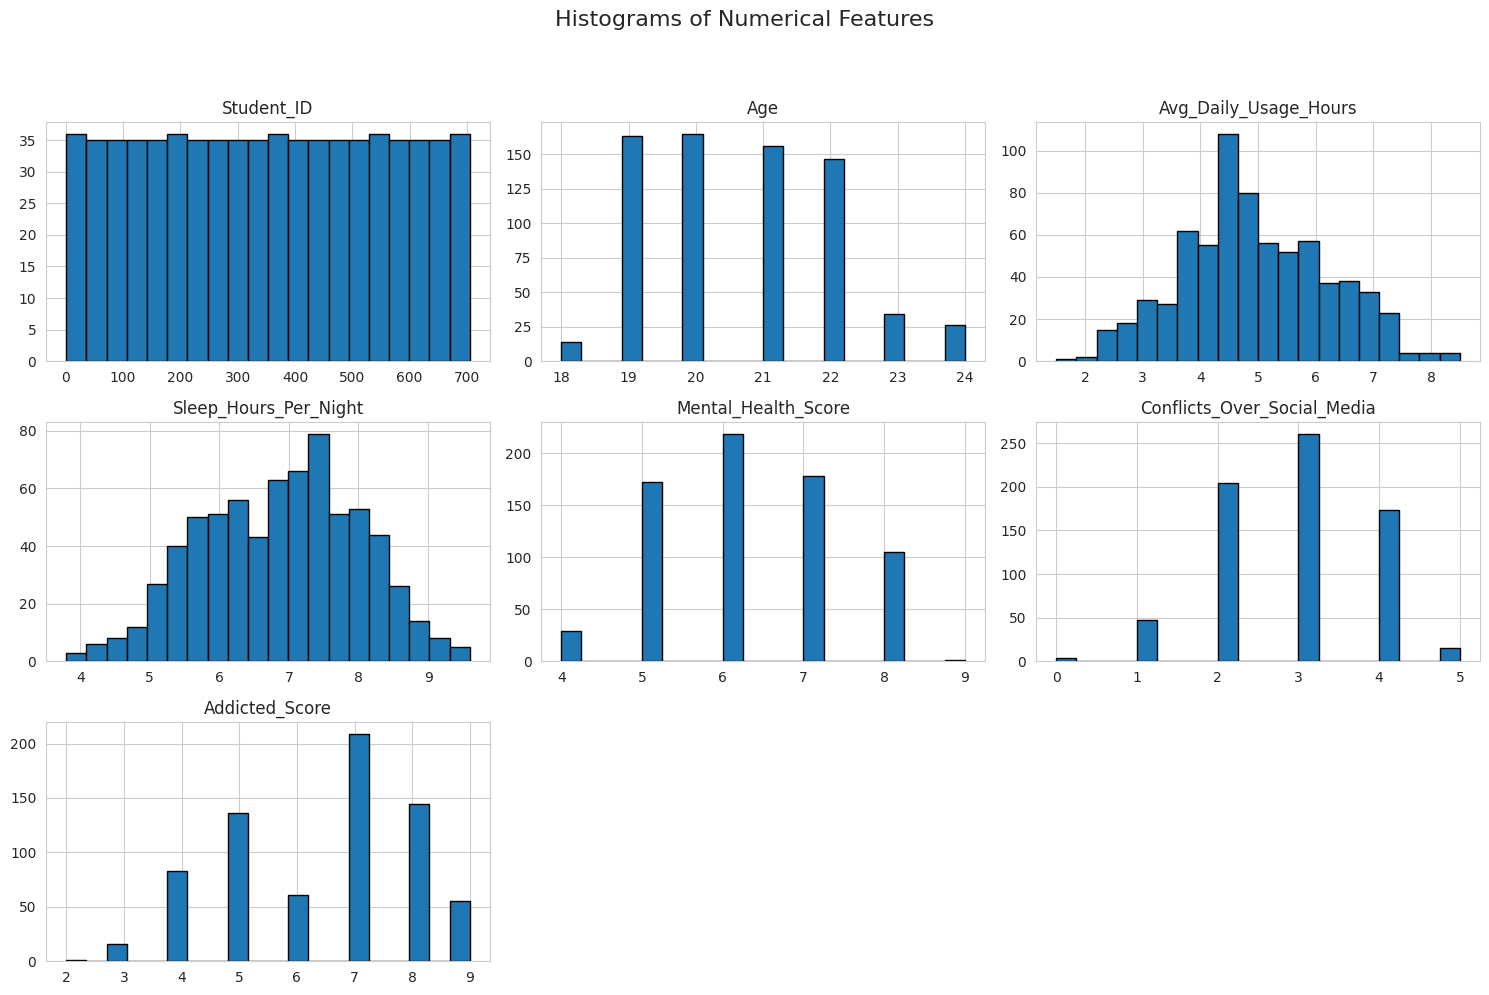

In [33]:
# Histograms for numerical features
print("\nGenerating Histograms for numerical features...")
numerical_df = df.select_dtypes(include=np.number)
if not numerical_df.empty:
    numerical_df.hist(bins=20, figsize=(15, 10), edgecolor='black')
    plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
    plt.show()
else:
    print("No numerical features found for histograms.")



Generating Count Plots for categorical features...


<ipython-input-35-550523788>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
<ipython-input-35-550523788>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
<ipython-input-35-550523788>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
<ipython-input-35-550523788>:12: FutureWarning: 

Passi

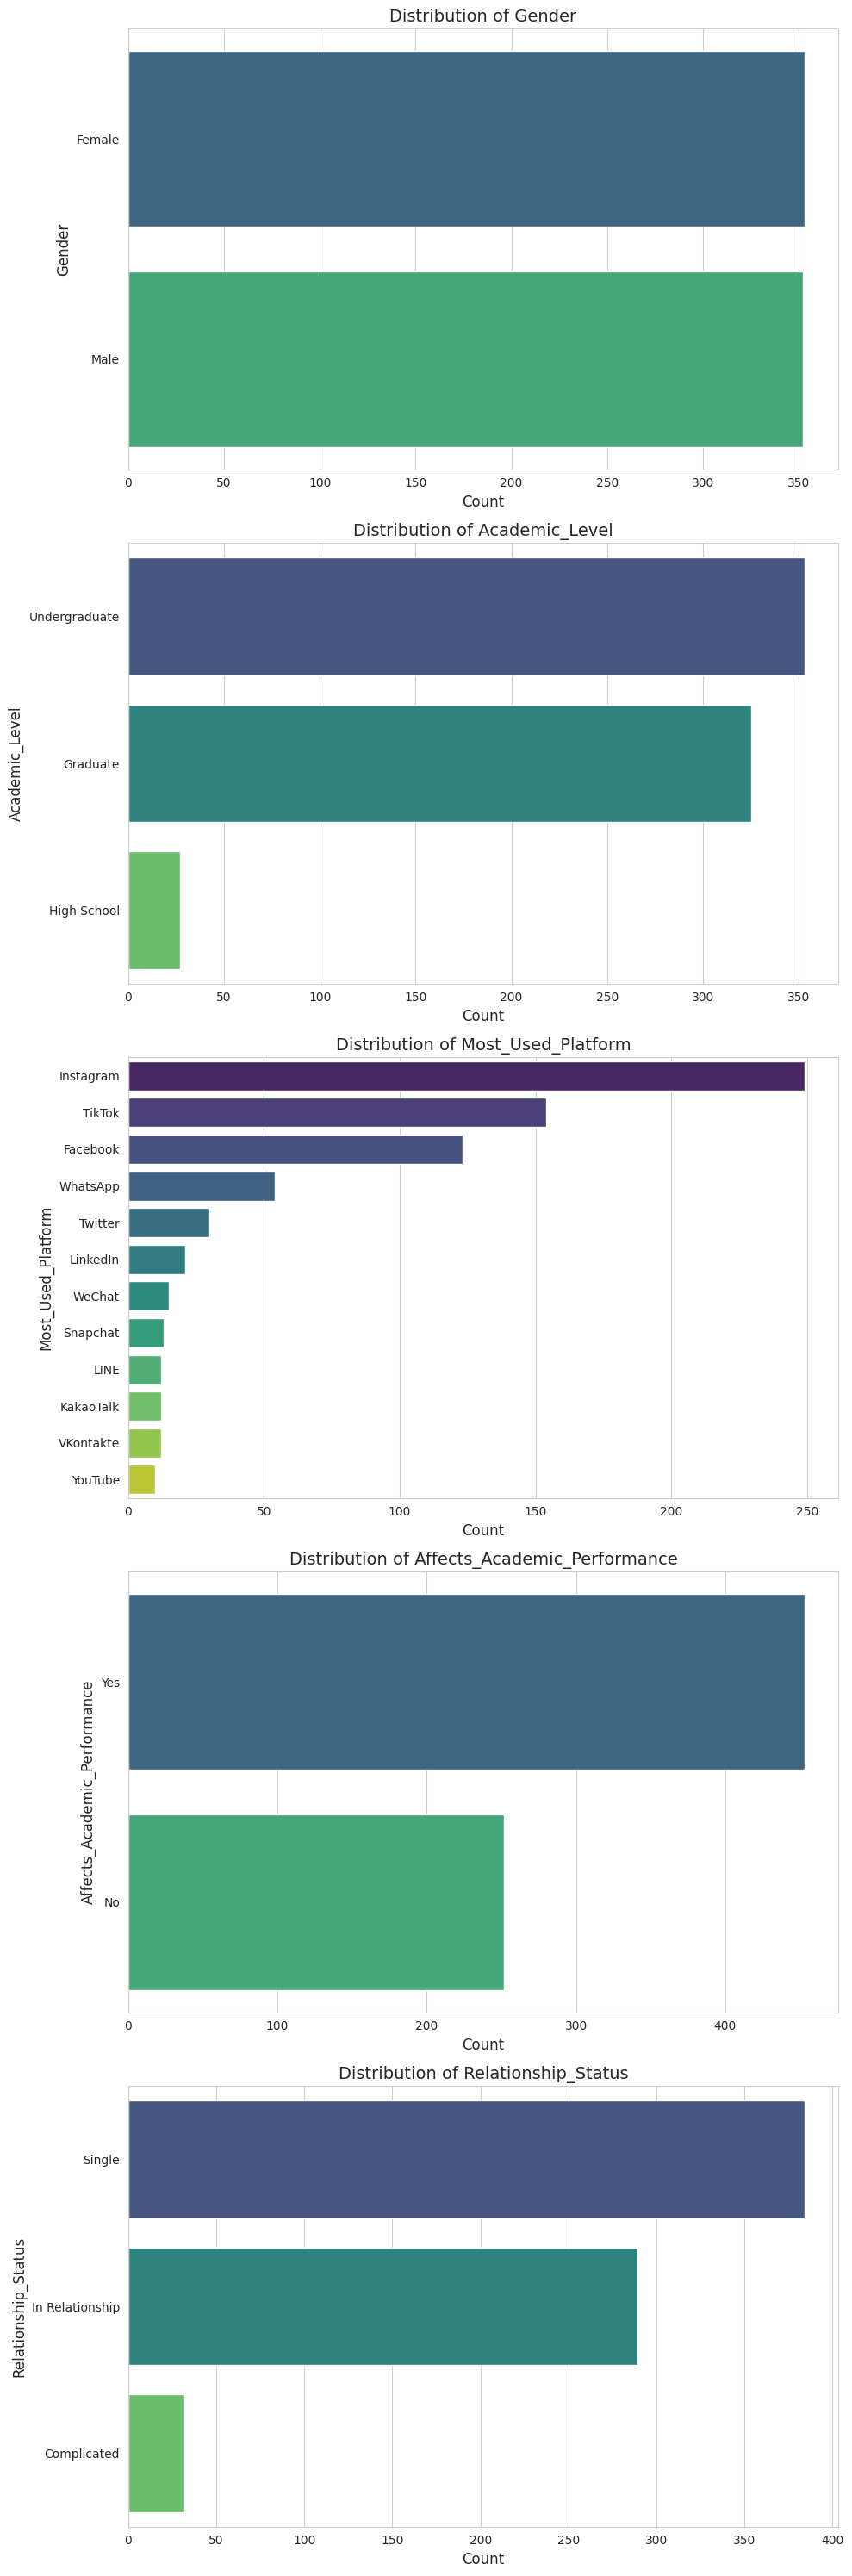

In [35]:
# Count plots for categorical features
print("\nGenerating Count Plots for categorical features...")
if len(categorical_cols) > 0:
    num_plots = len(categorical_cols)
    fig_height = min(6 * num_plots, 40) # Limit figure height to avoid excessively large plots
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, fig_height))
    # Ensure axes is iterable even if there's only one subplot
    axes = axes.flatten() if num_plots > 1 else [axes]

    for i, col in enumerate(categorical_cols):
        # Use y-axis for categories if there are many unique values, for better readability
        sns.countplot(data=df, y=col, ax=axes[i], palette='viridis', order=df[col].value_counts().index)
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel('Count', fontsize=12)
        axes[i].set_ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found for count plots.")

In [37]:
# --- CORRELATION BETWEEN FEATURES ---
print("\n--- CORRELATION BETWEEN FEATURES ---")



--- CORRELATION BETWEEN FEATURES ---



Generating Correlation Heatmap for numerical features...


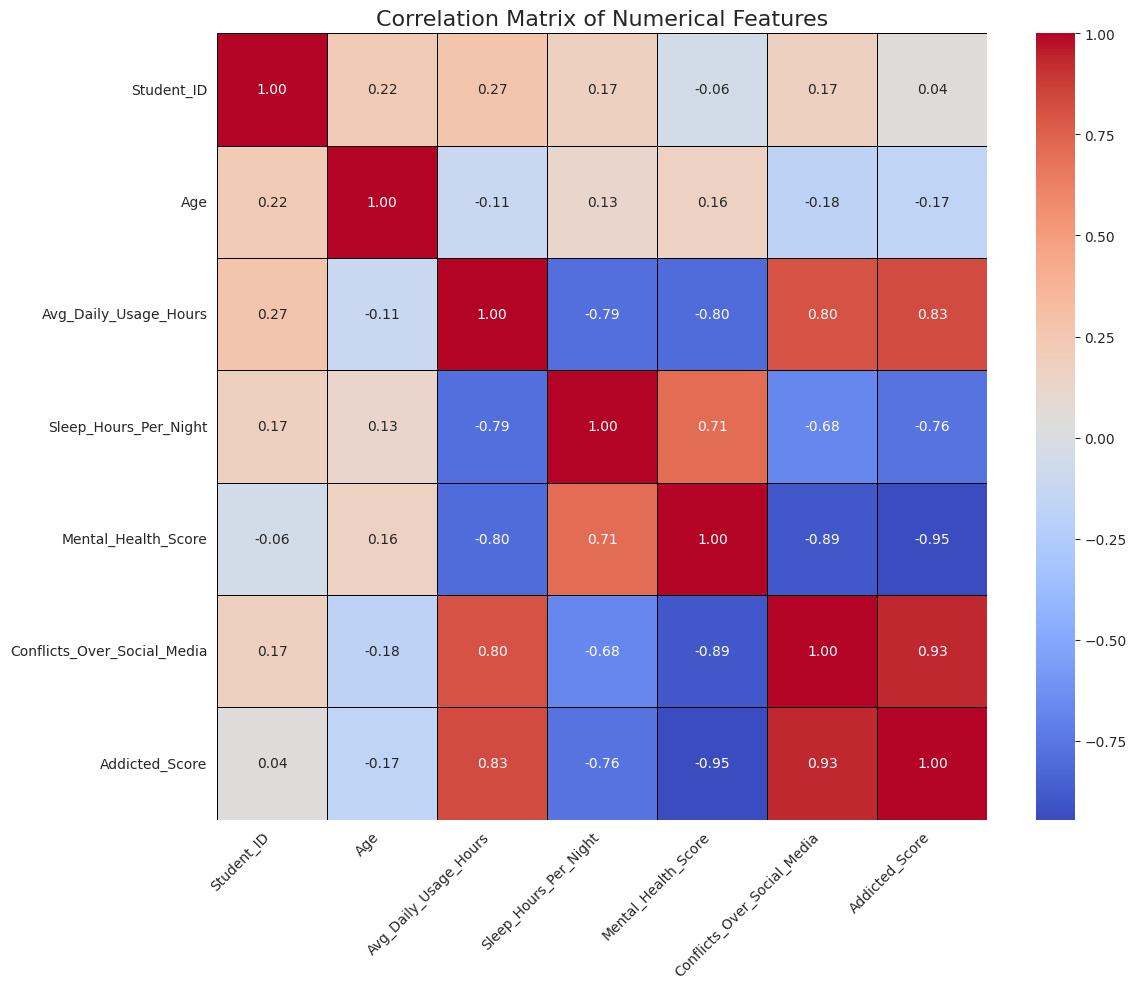


Interpretation:
  - Values close to 1 indicate a strong positive correlation.
  - Values close to -1 indicate a strong negative correlation.
  - Values close to 0 indicate a weak or no linear correlation.


In [39]:
# Correlation Heatmap for numerical features
print("\nGenerating Correlation Heatmap for numerical features...")
if not numerical_df.empty and numerical_df.shape[1] > 1:
    plt.figure(figsize=(12, 10))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    print("\nInterpretation:")
    print("  - Values close to 1 indicate a strong positive correlation.")
    print("  - Values close to -1 indicate a strong negative correlation.")
    print("  - Values close to 0 indicate a weak or no linear correlation.")
else:
    print("Not enough numerical features (need at least two) to generate a meaningful correlation heatmap.")




In [41]:
# --- ACCURACY (Machine Learning Context) ---
print("\n--- ACCURACY ---")
print("\n'Accuracy' is typically a metric used to evaluate the performance of a Machine Learning classification model.")
print("To calculate accuracy, you would first need to:")
print("1. Define a specific prediction task (i.e., what are you trying to predict?).")
print("2. Identify a target variable (the column you want to predict) in your dataset.")
print("3. Prepare your data for modeling (e.g., encode categorical variables, scale numerical features).")
print("4. Split your data into training and testing sets.")
print("5. Choose and train a classification model (e.g., Logistic Regression, Decision Tree, Random Forest).")
print("6. Make predictions on the test set.")
print("7. Calculate accuracy by comparing the predicted values to the actual values in the test set.")

print("\nAs an example, if you wanted to predict a binary outcome (e.g., 'Is the student highly addicted or not?'), you would follow the steps above.")
print("Without a specific prediction target, 'Accuracy' cannot be directly computed at this stage.")

print("\n--- END OF ANALYSIS ---")


--- ACCURACY ---

'Accuracy' is typically a metric used to evaluate the performance of a Machine Learning classification model.
To calculate accuracy, you would first need to:
1. Define a specific prediction task (i.e., what are you trying to predict?).
2. Identify a target variable (the column you want to predict) in your dataset.
3. Prepare your data for modeling (e.g., encode categorical variables, scale numerical features).
4. Split your data into training and testing sets.
5. Choose and train a classification model (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Make predictions on the test set.
7. Calculate accuracy by comparing the predicted values to the actual values in the test set.

As an example, if you wanted to predict a binary outcome (e.g., 'Is the student highly addicted or not?'), you would follow the steps above.
Without a specific prediction target, 'Accuracy' cannot be directly computed at this stage.

--- END OF ANALYSIS ---
